In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygeohash as pgh
from scipy import stats

In [2]:
sns.set()

In [3]:
df_geotab = pd.read_csv('../data/SearchingForParking_Toronto.csv')

In [4]:
df_geotab = df_geotab.rename({'Geohash': 'geohash'}, axis=1)

In [6]:
df_plf = pd.read_csv('parking_lot_facilities_cleaned.csv')

##### Merging with 6-character Geohash

In [114]:
df_geotab['geohash_6'] = df_geotab['geohash'].apply(lambda x: x[:6])

In [115]:
df_plf['geohash_6'] = df_plf['geohash'].apply(lambda x: x[:6])

In [116]:
df_geotab_6 = df_geotab.groupby('geohash_6')['AvgTimeToPark'].agg('mean').reset_index()

In [117]:
df_geotab_6

,geohash_6,AvgTimeToPark
0,dpxrvz,4.180000
1,dpxryp,3.232300
2,dpz2gg,3.064500
3,dpz2jc,5.400200
4,dpz2jd,4.731814
5,dpz2je,4.495593
6,dpz2jf,4.861350
7,dpz2jg,5.190767
8,dpz2jk,6.847300
9,dpz2jn,2.776075


In [118]:
df_plf_6 = df_plf.groupby('geohash_6')['parking_spots'].agg('sum').reset_index()

In [119]:
df_merged_6 = pd.merge(df_geotab_6, df_plf_6, on=['geohash_6'])

In [120]:
df_merged_6.shape

(156, 3)

In [77]:
df_merged_6_small = df_merged_6[df_merged_6.parking_spots < 25]

In [78]:
ps = df_merged_6['parking_spots']

In [79]:
print(np.min(ps), np.mean(ps), np.median(ps), np.max(ps))

0.0 101.17307692307692 68.5 557.0


In [101]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300]

In [102]:
labels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]

In [103]:
df_merged_6['binned'] = pd.cut(df_merged_6['parking_spots'], bins=bins, labels=labels)

In [104]:
df_binned = df_merged_6.groupby('binned')['AvgTimeToPark'].agg('mean').reset_index()

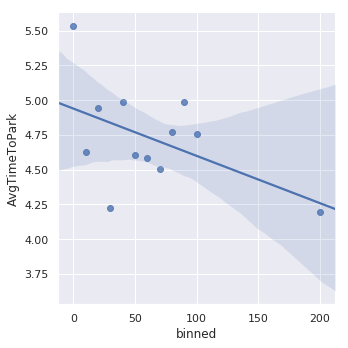

In [105]:
sns.lmplot(x='binned', y='AvgTimeToPark', data=df_binned)

In [50]:
stats.linregress(df_binned['binned'], df_binned['AvgTimeToPark'])

LinregressResult(slope=-0.24446300973538246, intercept=31.169311827314097, rvalue=-0.748681853866662, pvalue=0.012720975928486904, stderr=0.07653113939917884)

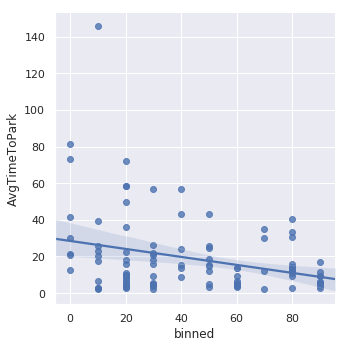

In [44]:
sns.lmplot(x='binned', y='AvgTimeToPark', data=df_merged_6)

In [17]:
df_merged_6['parking_spots_ln'] = df_merged_6['parking_spots'].apply(lambda x: math.log(max(x, 1)))

In [10]:
stats.linregress(df_merged['parking_spots'], df_merged['AvgTimeToPark'])

LinregressResult(slope=-0.002555056022344729, intercept=5.2255772982461774, rvalue=-0.18701907819383354, pvalue=0.4169350515824565, stderr=0.003078979100875691)

In this case, we can decide to remove the point at the rightmost part of the graph (seems like a outlier, having a very high number of parking spots).

##### Merging with 7 character Geohash

In [7]:
df_merged = pd.merge(df_geotab, df_plf, on=['geohash'])

In [8]:
df_merged['parking_spots']

0      33.0
1     175.0
2      29.0
3     162.0
4       0.0
5       0.0
6      91.0
7      36.0
8       0.0
9     147.0
10     53.0
11    420.0
12     67.0
13     33.0
14    227.0
15     47.0
16     45.0
17    104.0
18    125.0
19     79.0
20    238.0
Name: parking_spots, dtype: float64

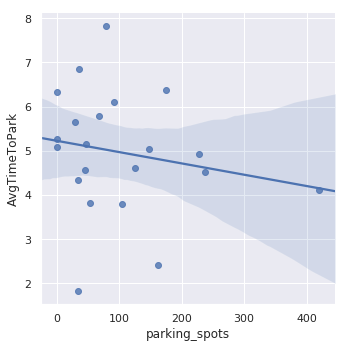

In [9]:
sns.lmplot(x='parking_spots', y='AvgTimeToPark', data=df_merged)

In [10]:
stats.linregress(df_merged['parking_spots'], df_merged['AvgTimeToPark'])

LinregressResult(slope=-0.002555056022344729, intercept=5.2255772982461774, rvalue=-0.18701907819383354, pvalue=0.4169350515824565, stderr=0.003078979100875691)

In this case, we can decide to remove the point at the rightmost part of the graph (seems like a outlier, having a very high number of parking spots).

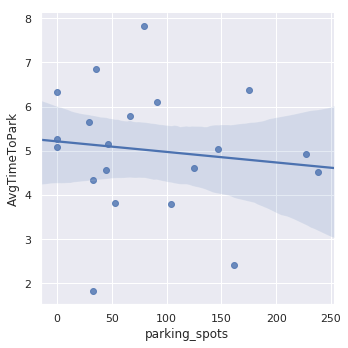

In [11]:
df_merged2 = df_merged[~df_merged.index.isin([11])]
sns.lmplot(x='parking_spots', y='AvgTimeToPark', data=df_merged2)

In [12]:
stats.linregress(df_merged2['parking_spots'], df_merged2['AvgTimeToPark'])

LinregressResult(slope=-0.002387964307803153, intercept=5.213952382224757, rvalue=-0.12284495290362585, pvalue=0.6058778031731202, stderr=0.004547077323085025)

In both cases, we can see that the results are not significant enough to conclude that more parking spots do not lead to a lower average parking time.
We also looked at what happens when aggregating at a 6-character level.

In [2]:
df = pd.read_csv('../data/MERGED_TO_PARKINGTICKETS_TRAFFICVOL_GEOHASH_X_HOURLY.csv')

In [3]:
df.head(5)

,Unnamed: 0,time_stamp,infraction_description,addr,lat,lng,tag_number_masked,set_fine_amount,geo_hash,record_date,8hr_Vehicle_Vol,8hr_Pedestrian_Vol
0,0,20170101:00,PARK COMMERC LOAD ZONE NOT LDG,ST PATRICK ST,43.655975,-79.390937,4.0,160.0,dpz837m,2017-01-01,NaN,NaN
1,1,20170101:00,PARK ONSTRT ACCESSIBLE NO PRMT,ST PATRICK ST,43.655975,-79.390937,1.0,450.0,dpz837m,2017-01-01,NaN,NaN
2,2,20170101:00,PARK-SIGNED HWY-PROHIBIT DY/TM,ST PATRICK ST,43.655975,-79.390937,3.0,150.0,dpz837m,2017-01-01,NaN,NaN
3,3,20170101:04,PARK ON PRIVATE PROPERTY,ST PATRICK ST,43.655975,-79.390937,2.0,60.0,dpz837m,2017-01-01,NaN,NaN
4,4,20170101:00,PARK ON PRIVATE PROPERTY,BATHURST ST,43.673291,-79.414390,4.0,120.0,dpz82yk,2017-01-01,NaN,NaN


In [12]:
x = df_merged['parking_spots']
y = df_merged['AvgTimeToPark']

In [33]:
x = x.apply(lambda x: max(x, 0.1))

In [48]:
z = np.poly1d(np.polyfit(np.log(x), y, 3))

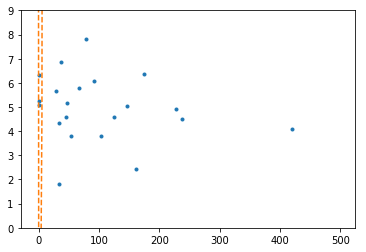

In [47]:
xp = np.linspace(-5, 500, 100)
_ = plt.plot(x, y, '.', xp, z(xp), '--')
plt.ylim(0,9)
plt.show()

In [52]:
z1 = np.poly1d(np.polyfit(x, y, 4))

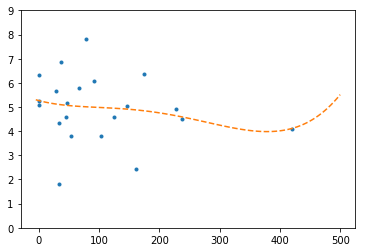

In [53]:
xp = np.linspace(-5, 500, 100)
_ = plt.plot(x, y, '.', xp, z1(xp), '--')
plt.ylim(0,9)
plt.show()

In [54]:
from scipy import stats

In [55]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [56]:
stats.linregress(x,y)

LinregressResult(slope=-0.0025549495201270997, intercept=5.225603091516398, rvalue=-0.1869841332156103, pvalue=0.4170236831266376, stderr=0.0030794470110268885)

## Geotab hourly distribution

In [5]:
df_geotab = df_geotab[['geohash', 'SearchingByHour']]

In [6]:
from ast import literal_eval

In [7]:
df_geotab['SearchingByHour'] = df_geotab['SearchingByHour'].apply(lambda s: s.replace("null", "0"))

In [8]:
df_geotab['SearchingByHour'] = df_geotab['SearchingByHour'].apply(literal_eval)

In [9]:
df_geotab['SearchingByHour'].iloc[0]

{'00': 0,
 '01': 0,
 '02': 0,
 '03': 0,
 '04': 0.5,
 '05': 0.5,
 '06': 0,
 '07': 0.25,
 '08': 0.1429,
 '09': 0.2083,
 '10': 0.1765,
 '11': 0.5455,
 '12': 0.402,
 '13': 0.4,
 '14': 0.5,
 '15': 0.1667,
 '16': 0.5,
 '17': 0.0741,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0}

In [10]:
df_geotab['SearchingByHour'] = df_geotab['SearchingByHour'].apply(lambda x: {int(k): v for k,v in x.items()})

In [11]:
df_geotab

,geohash,SearchingByHour
0,dpz2nth,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0.5, 5: 0.5, 6: 0,..."
1,dpz2pnp,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0.4444, 6: 0..."
2,dpz9k90,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ..."
3,dpz95wt,"{0: 0.3333, 1: 0, 2: 0.1667, 3: 0.25, 4: 0.25,..."
4,dpz2jsn,"{0: 0.4, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7..."
5,dpz2nmb,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ..."
6,dpz2nhk,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ..."
7,dpz2nj3,"{0: 0, 1: 0.037, 2: 0, 3: 0, 4: 0.0439, 5: 0.0..."
8,dpz2nf9,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0.0909, 5: 0.0588,..."
9,dpz9jyk,"{0: 0, 1: 0, 2: 0.0286, 3: 0.0645, 4: 0, 5: 0...."


In [43]:
import pickle

In [12]:
df_geotab.to_csv("hourlydistribution.csv")

In [100]:
hourly_agg = df_geotab.groupby('geohash_6')['HourlyDistribution'].apply(list).reset_index()

In [101]:
def merge_dict(l):
    keys = l[0].keys()
    output_dict = dict()
    for k in keys:
        output_dict[k] = sum([d[k] for d in l])
    return output_dict

In [102]:
hourly_agg['HourlyDistribution'] = hourly_agg['HourlyDistribution'].apply(merge_dict)

In [103]:
hourly_agg

,geohash_6,HourlyDistribution
0,dpxrvz,"{'12': 0.3333, '10': 0.3512, '22': 0, '04': 0,..."
1,dpxryp,"{'12': 0.0805, '10': 0.0805, '22': 0.0805, '04..."
2,dpz2gg,"{'12': 0.0909, '10': 0.0909, '22': 0, '04': 0,..."
3,dpz2jc,"{'12': 0.0909, '10': 0.0909, '22': 0, '04': 0...."
4,dpz2jd,"{'12': 0.4838, '10': 0.4159, '22': 0.2679, '04..."
5,dpz2je,"{'12': 1.3873, '10': 1.0798999999999999, '22':..."
6,dpz2jf,"{'12': 0.1111, '10': 0.2778, '22': 0, '04': 0,..."
7,dpz2jg,"{'12': 0.5832999999999999, '10': 0.3333, '22':..."
8,dpz2jk,"{'12': 0, '10': 0.1429, '22': 0, '04': 0, '08'..."
9,dpz2jn,"{'12': 0.1381, '10': 0.3881, '22': 0.0667, '04..."


# Simple Clustering

In [109]:
df = pd.read_csv('../data/clusterAnalysisDat.csv')

In [110]:
df_cluster = df.drop(['Unnamed: 0', 'parkGeoHash', 'spendGeoHash', 'spendDistrict', 'parkDistrict'], axis=1)

In [111]:
df_cluster.columns

Index(['pctTimeSpend', 'parkGeoHash_AvgTimeToPark',
       'parkGeoHash_PercentSearching', 'spendGeoHash_AvgTimeToPark',
       'spendGeoHash_PercentSearching', 'distance', 'spend_lat', 'spend_lng',
       'park_lat', 'park_lng', 'spendFoodC', 'spendShopC', 'parkFoodC',
       'parkShopC', 'parkAvgTimeToParkRatio', 'parkTotalSearching',
       'parkAvgUniqueGeohashes', 'parkAvgTotalGeohashes', 'parkPercentCar',
       'parkPercentMPV', 'parkPercentLDT', 'parkPercentMDT', 'parkPercentHDT',
       'parkPercentOther', 'spendAvgTimeToParkRatio', 'spendTotalSearching',
       'spendAvgUniqueGeohashes', 'spendAvgTotalGeohashes', 'spendPercentCar',
       'spendPercentMPV', 'spendPercentLDT', 'spendPercentMDT',
       'spendPercentHDT', 'spendPercentOther'],
      dtype='object')

In [112]:
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [33]:
cluster.k_means(df_cluster, 6)

(array([[ 1.14371946e-01,  5.59092155e+00,  9.91589881e-02,
          5.57986170e+00,  9.92338132e-02,  3.80300000e+03,
          4.36869272e+01, -7.94046072e+01,  4.36869395e+01,
         -7.94045866e+01,  1.15594406e+01,  1.22381736e+01,
          1.15232415e+01,  1.21801728e+01,  1.60360950e+00,
          1.66709173e+01,  5.01467984e+00,  8.21346117e+00,
          5.87259975e-02,  3.07625010e-01,  3.35388482e-01,
          4.84648704e-02,  1.00975936e-01,  1.48817812e-01,
          1.60456709e+00,  1.66779103e+01,  4.99942760e+00,
          8.19494044e+00,  5.85366516e-02,  3.09129782e-01,
          3.34854628e-01,  4.78051831e-02,  1.01645372e-01,
          1.48027273e-01],
        [ 1.18198276e-01,  5.03601724e+00,  1.05674138e-01,
          5.07825862e+00,  1.02498276e-01,  1.23264000e+05,
          4.37489655e+01, -7.94017241e+01,  4.37491379e+01,
         -7.94018966e+01,  5.82758621e+00,  1.02241379e+01,
          5.55172414e+00,  9.94827586e+00,  1.63167759e+00,
          1.2

Variance: 1.0


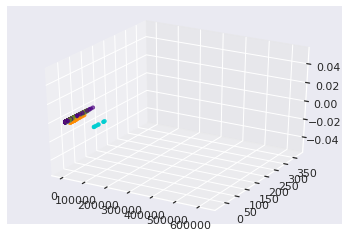

In [113]:
n_component=3
pca = PCA(n_components=n_component)
reduced_data = pca.fit_transform(df_cluster)


kmeans = cluster.KMeans(init='k-means++', n_clusters=6)
kmeans.fit(reduced_data)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

labels = kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_
centroids= kmeans.cluster_centers_
reduced_center = pca.fit_transform(centroids)


colors=['olivedrab', "darkturquoise", "plum", "darkorange", "lightslategray", "indigo"]
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]

print('Variance: {}'.format(sum(pca.explained_variance_ratio_)))
plt.scatter(reduced_data[:,0], reduced_data[:,1], reduced_data[:2], c=label_color)
plt.show()

In [92]:
n_component=3
pca = PCA(n_components=n_component)
reduced_data = pca.fit_transform(df_cluster)


aff = cluster.AffinityPropagation(max_iter=10)
aff.fit(reduced_data)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

labels = aff.labels_
aff.cluster_centers_
aff.inertia_
centroids= aff.cluster_centers_
reduced_center = pca.fit_transform(centroids)


colors=['olivedrab', "darkturquoise", "plum", "darkorange", "lightslategray", "indigo"]
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]

print('Variance: {}'.format(sum(pca.explained_variance_ratio_)))
plt.scatter(reduced_data[:,0], reduced_data[:,1], reduced_data[:2])
plt.show()

MemoryError: 